Recording...


TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given

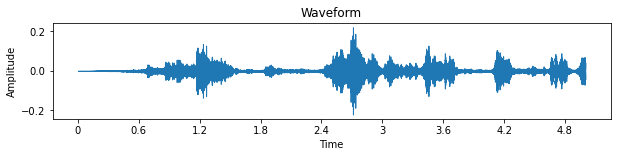

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import sounddevice as sd

def plot_live_features(duration=5, sample_rate=44100):
    # Record audio from microphone
    print("Recording...")
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  # Wait for recording to complete

    # Extract audio signal
    y = np.squeeze(audio_data)

    # Plot waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sample_rate)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Compute and plot mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y, sr=sample_rate)
    plt.subplot(3, 1, 2)
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Mel)')

    # Compute and plot spectrogram
    spectrogram = np.abs(librosa.stft(y))
    plt.subplot(3, 1, 3)
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

# Example usage
plot_live_features()